Given Points: We start with at least four fixed points, as well as a target point (x0, y0).

Constructing Polynomials: For each combination of three fixed points, we construct an interpolated polynomial using Lagrange interpolation method that passes through the three points.

Sorting Polynomials: After constructing all possible polynomials, we need to sort them based on their proximity to the target point (x0, y0).

We measure this proximity by calculating the absolute difference between the value of each polynomial at the target x-coordinate (Pi(x0)) and the y-coordinate of the target point (y0).
We want to minimize this absolute difference.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../util')

from lagrange_poly import lagrange_poly

In [3]:
DESIRED_DEGREE = 3

In [4]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y


points = [
    Point(-3, 12.2),
    Point(-14, 8.2),
    Point(1.1, -1.3),
    Point(5.22, -10),
    Point(9, -6)
]

target_point = Point(0, 0)

In [41]:
def get_all_points_indexes_combinations(count, desired_degree=DESIRED_DEGREE, result=[]):
    if count == desired_degree:
        result.append([i for i in range(desired_degree-1, -1, -1)])
        return result

    for i in range(count-2, 0, -1):
        for j in range(i-1, -1, -1):
            if i != j:
                result.append([count-1, i, j])

    return get_all_points_indexes_combinations(count-1, desired_degree, result)

print(get_all_points_indexes_combinations(5, result=[]))

[[4, 3, 2], [4, 3, 1], [4, 3, 0], [4, 2, 1], [4, 2, 0], [4, 1, 0], [3, 2, 1], [3, 2, 0], [3, 1, 0], [2, 1, 0]]


In [48]:
def sort_polinoms_by_proximity_to_target(points, target_point, desired_degree=DESIRED_DEGREE):
    combinations = get_all_points_indexes_combinations(len(points), result=[])
    disered_combinations_order = sorted(
        combinations,
        key = lambda combination: abs(lagrange_poly(np.array([points[i].x for i in combination]),
          np.array([points[i].y for i in combination]), target_point.x) - target_point.y)
    )

    return disered_combinations_order

sort_polinoms_by_proximity_to_target(points, target_point)

[[3, 2, 1],
 [4, 2, 1],
 [4, 3, 0],
 [4, 2, 0],
 [3, 2, 0],
 [2, 1, 0],
 [4, 3, 2],
 [3, 1, 0],
 [4, 1, 0],
 [4, 3, 1]]

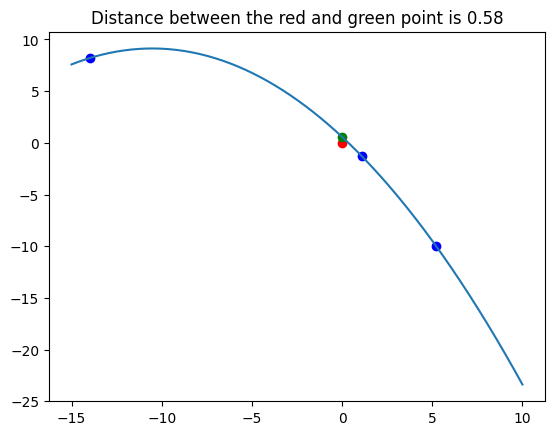

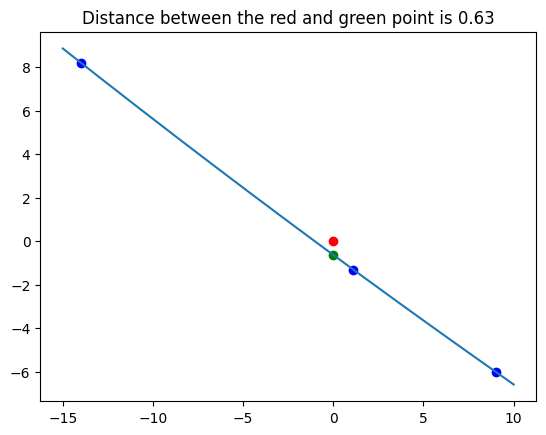

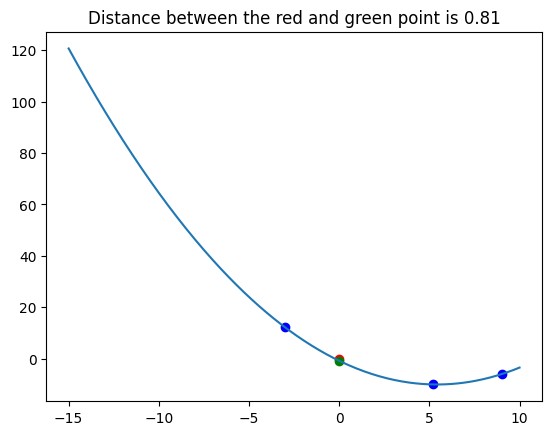

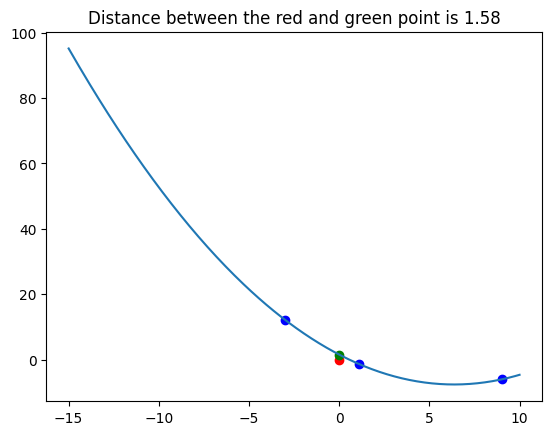

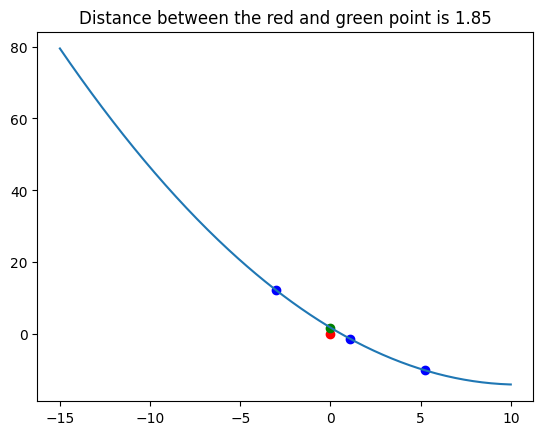

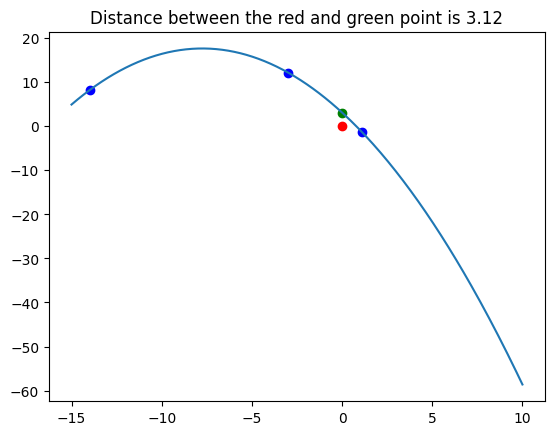

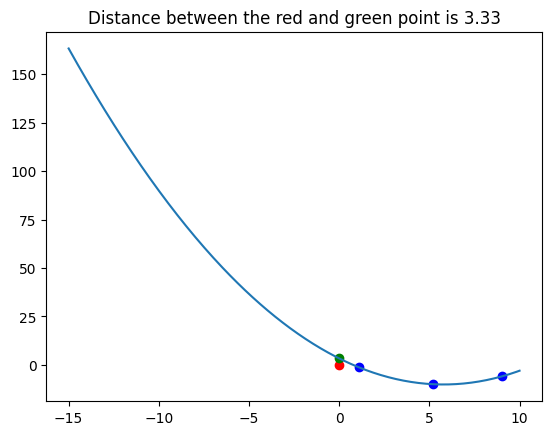

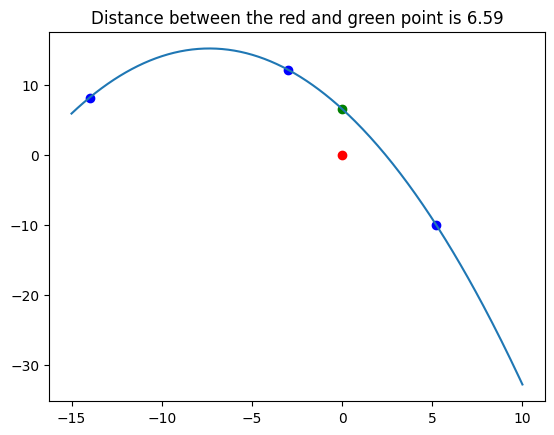

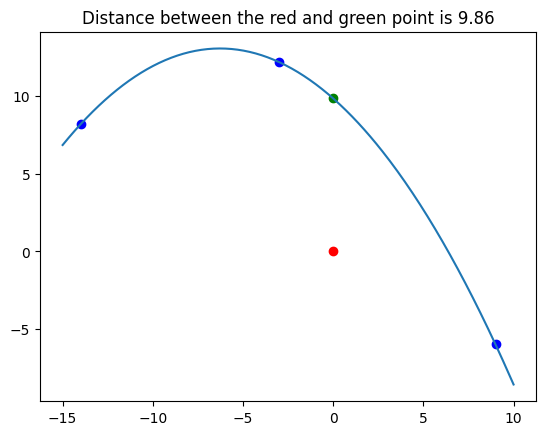

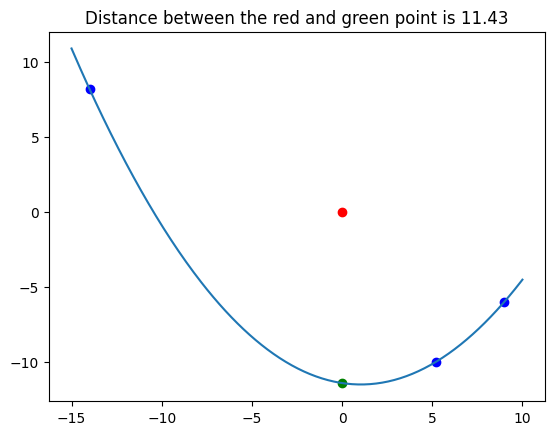

In [49]:
min_of_points = min(points, key = lambda p: p.x)
lower_bound = min(min_of_points.x, target_point.x) - 1

max_of_points = max(points, key = lambda p: p.x)
upper_bound = max(max_of_points.x, target_point.x) + 1

combinations = sort_polinoms_by_proximity_to_target(points, target_point)

x_axis = np.linspace(lower_bound, upper_bound, 300)

for i in range(0, len(combinations)):
    xs = [points[j].x for j in combinations[i]]
    ys = [points[j].y for j in combinations[i]]

    diff = abs(lagrange_poly(np.array(xs), np.array(ys), target_point.x) - target_point.y)

    plt.scatter([target_point.x], [target_point.y], color='red')
    plt.scatter(xs, ys, color='blue')
    plt.scatter([target_point.x], [lagrange_poly(np.array(xs), np.array(ys), target_point.x)], color='green')
    plt.plot(x_axis, lagrange_poly(np.array(xs), np.array(ys), x_axis))
    plt.title(f'Distance between the red and green point is {round(diff, 2)}')
    plt.show()